In [1]:
# Import public packages.
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi 
from importlib import reload
import pickle

# Import my packages.
%matplotlib inline
import matplotlib as mpl
%matplotlib notebook
%matplotlib notebook

import sys
from importlib import reload
sys.path.append('/Users/michaelstadler/Bioinformatics/Projects/insulators/bin')
from hic_jupyter import viewer
import hic_jupyter as hc

GridspecLayout(children=(Dropdown(description='Chrom', layout=Layout(grid_area='widget001'), options=('X', '3L…

<IPython.core.display.Javascript object>


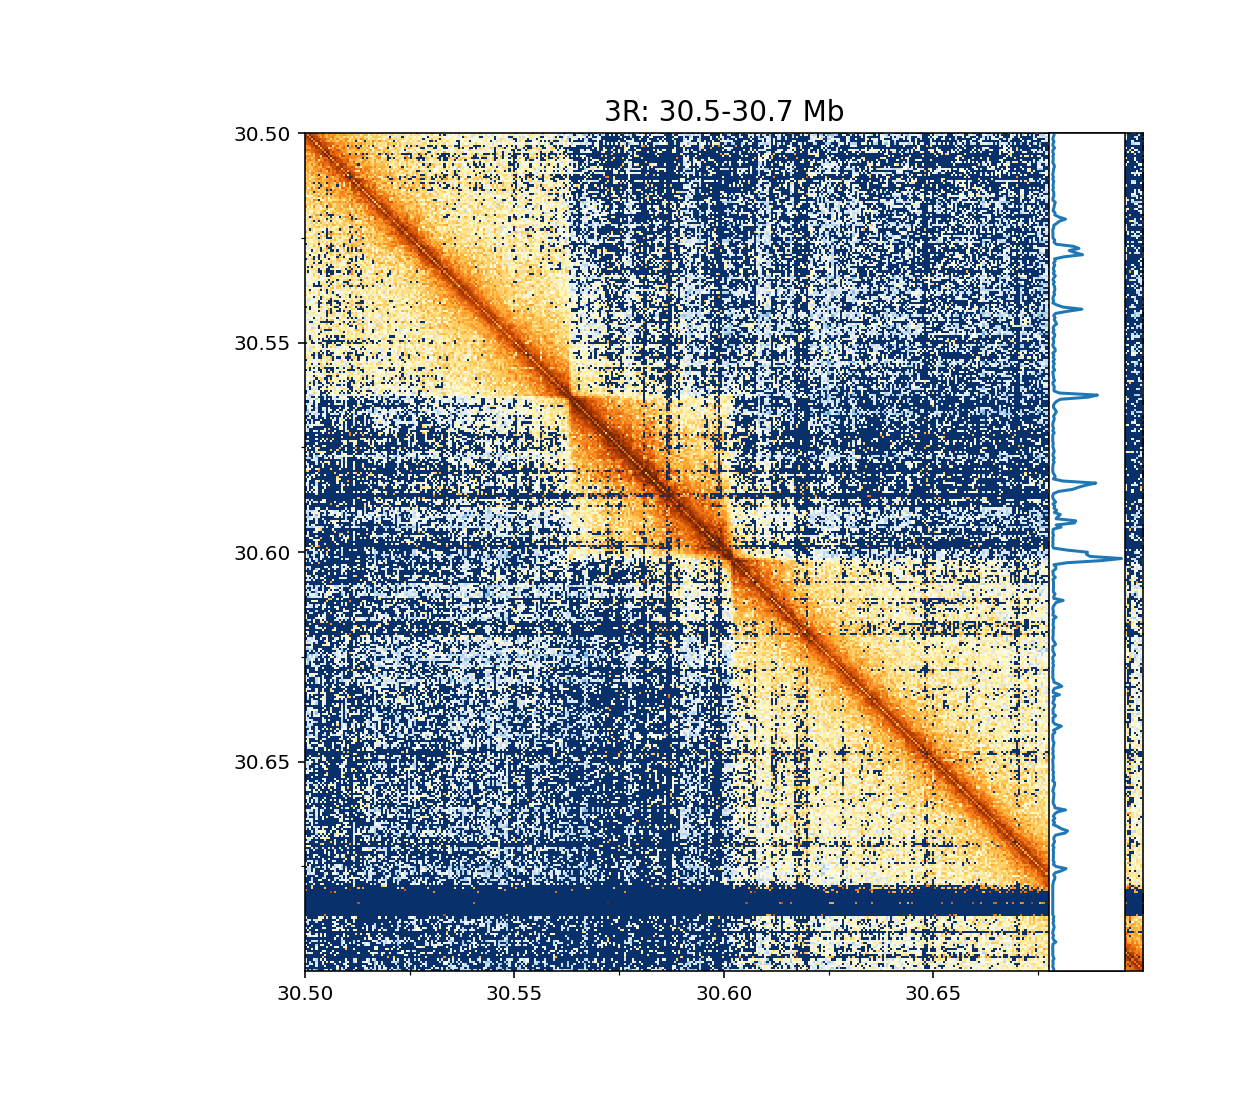

In [6]:
reload(hc)
data_folder = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewer_data/viewer_files/hic-53-54'
track_folder = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewer_data/viewer_tracks_reduced'
save_folder = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewer_data/saves/hic-53-54'
hc.viewer(data_folder, track_folder, save_folder)

In [252]:
a = ['a', 'c', 'b']


['a', 'b', 'c']

GridspecLayout(children=(Dropdown(description='Chrom', layout=Layout(grid_area='widget001'), options=('scaffol…

<IPython.core.display.Javascript object>


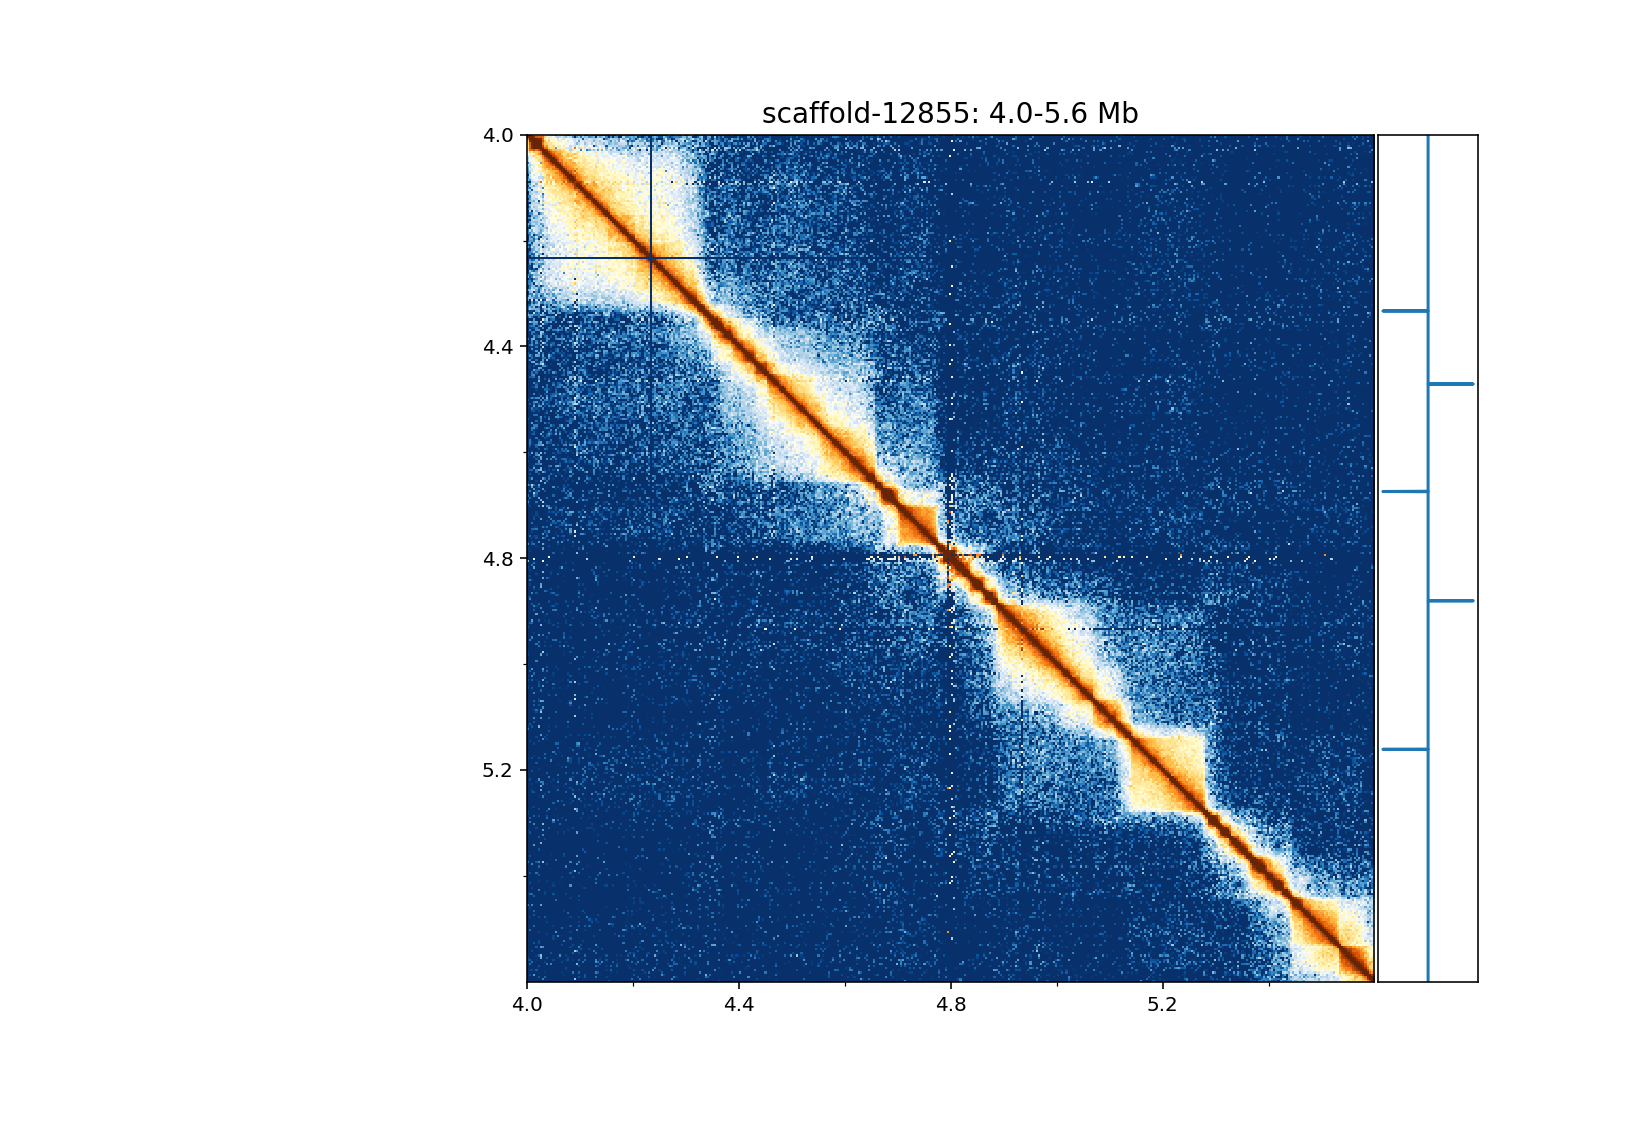

/Users/michaelstadler/Bioinformatics/Projects/insulators/viewerfiles/virilis-56to59-64/scaffold-12823_2000000_2800000_2000.txt
/Users/michaelstadler/Bioinformatics/Projects/insulators/viewerfiles/virilis-56to59-64/scaffold-10324_800000_1600000_2000.txt
/Users/michaelstadler/Bioinformatics/Projects/insulators/viewerfiles/virilis-56to59-64/scaffold-10324_800000_1600000_2000.txt
/Users/michaelstadler/Bioinformatics/Projects/insulators/viewerfiles/virilis-56to59-64/scaffold-10324_800000_1600000_2000.txt
/Users/michaelstadler/Bioinformatics/Projects/insulators/viewerfiles/virilis-56to59-64/scaffold-10324_800000_1600000_2000.txt
/Users/michaelstadler/Bioinformatics/Projects/insulators/viewerfiles/virilis-56to59-64/scaffold-12932_1800000_2200000_1000.txt
/Users/michaelstadler/Bioinformatics/Projects/insulators/viewerfiles/virilis-56to59-64/scaffold-12932_1800000_2200000_1000.txt
/Users/michaelstadler/Bioinformatics/Projects/insulators/viewerfiles/virilis-56to59-64/scaffold-12932_800000_240000

In [18]:
data_folder = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewerfiles/virilis-56to59-64'
track_folder = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewerfiles/viewer_tracks_vir'
save_folder = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewerfiles/saves/virilis/'
hc.viewer(data_folder, track_folder, save_folder)

GridspecLayout(children=(Dropdown(description='Chrom', layout=Layout(grid_area='widget001'), options=('XL-grou…

<IPython.core.display.Javascript object>


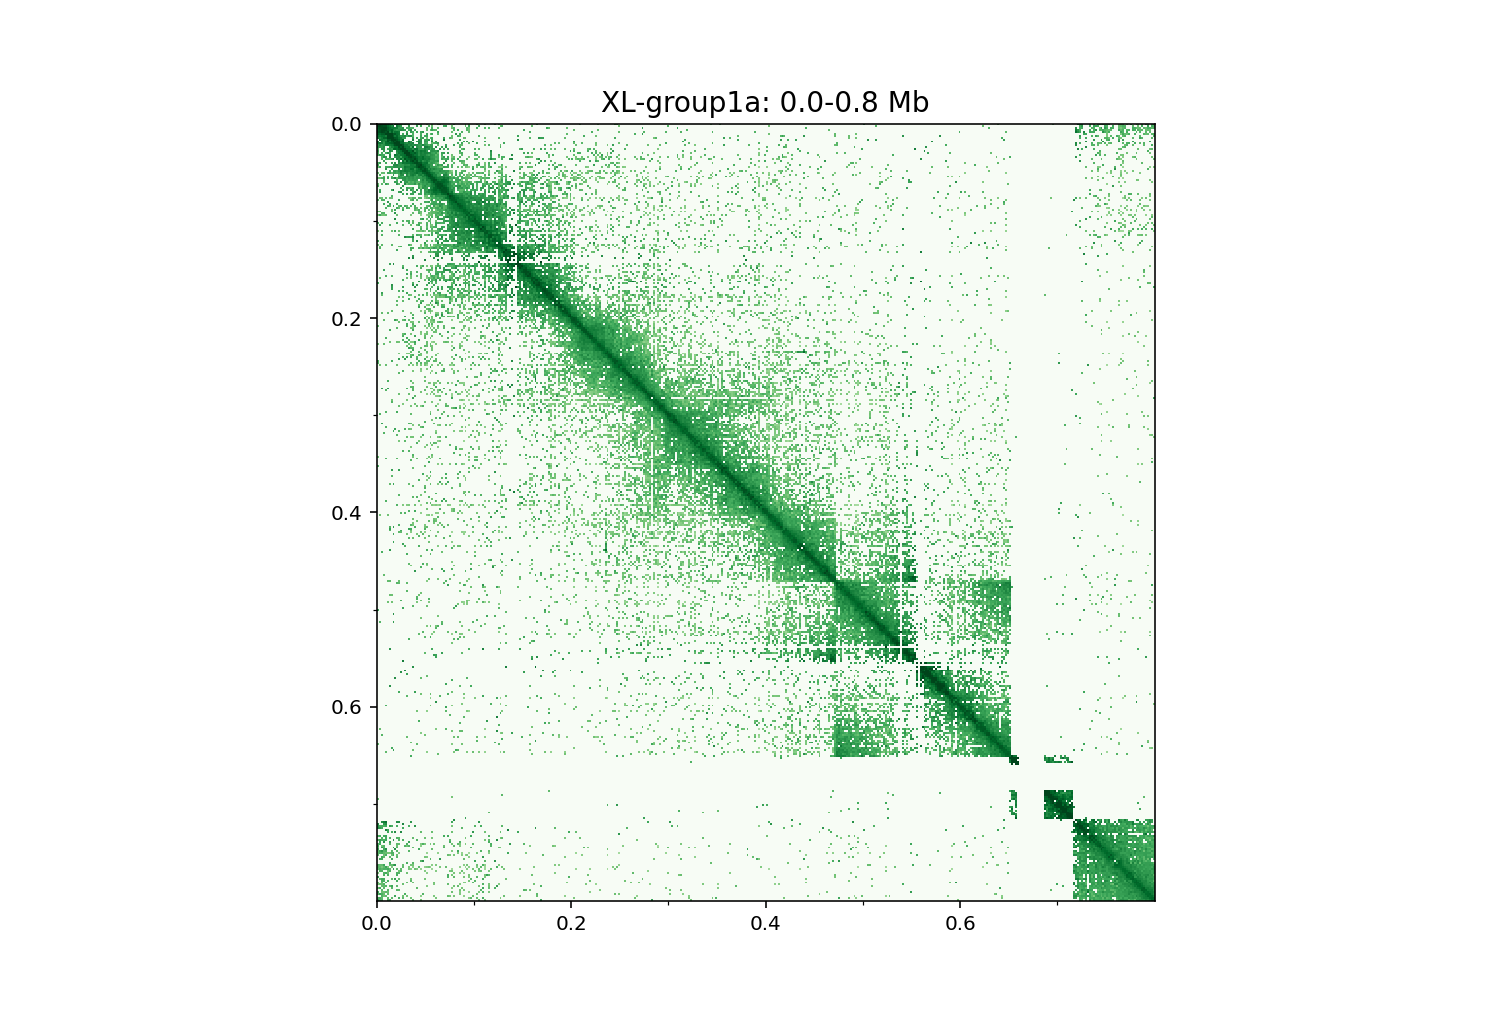

In [13]:
data_folder = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewerfiles/pseudo-hic-63'
track_folder = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewerfiles/viewer_tracks'
save_folder = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewerfiles/saves/pseudo'
hc.viewer(data_folder, track_folder, save_folder, genometracks=False)

In [ ]:
import gzip
f = '/Users/michaelstadler/Bioinformatics/Projects/insulators/data/mapping/HiC-53_mappingV1_3_unique_pairMergedV3_melmel_Collapsed_genomicFiltered.txt.gz'
file = gzip.open(f, 'rt')

for line in file:
    
    
    

Going to write a distance correction script

In [25]:
import numpy as np
infilename = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewerfiles/hic-53-54/2L_4400000_4800000_1000.txt.gz'
x = hc.load_viewer_file(infilename)

In [36]:
m = hc.mesh_like(x, 2)
d = abs(m[0] - m[1])

<IPython.core.display.Javascript object>


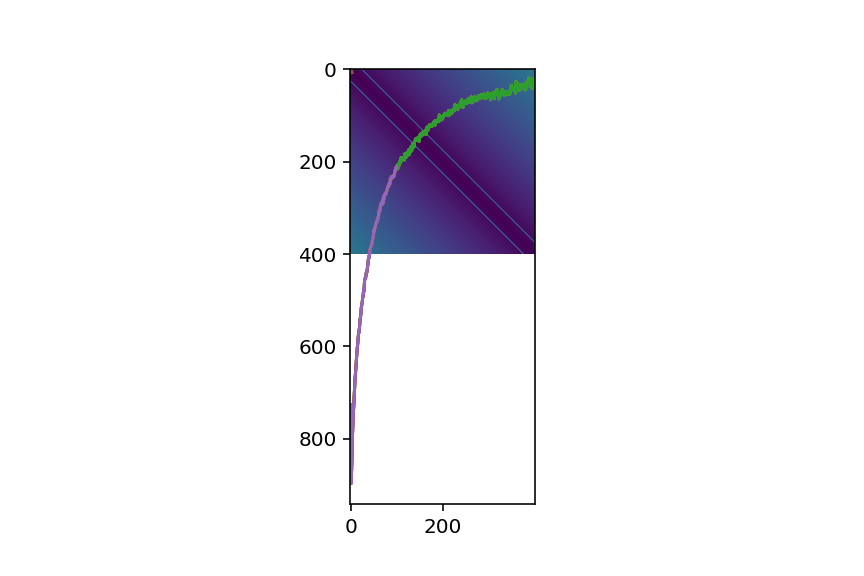

In [42]:
d1 = d.copy()
d1[d1==25] = 1000
plt.imshow(d1)

In [52]:
np.mean(x[d == 399])

0.0

1) Go through all the files of a given resolution and add distance-binned values.  
2) Normalize each map, write corrected.

In [183]:
import os
from hic_jupyter import load_viewer_file

# Inputs.
data_folder = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewerfiles/test/'
out_folder = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewerfiles/test_out'
size = 400
binsize = 500

def distance_normalize_hic_viewerfiles(data_folder, out_folder, size=400, bin_size=500):
    # Get values as a function of distance.
    binfile_match = '_' + str(bin_size) + '.txt'
    sums_ = np.zeros(size)
    counts = np.zeros(size)
    mesh = hc.mesh_like(np.zeros((size,size)), 2)
    diag_dist = abs(m[0] - m[1])
    count = 0
    for filename in os.listdir(data_folder):
        if binfile_match in filename:
            count += 1
            if (count % 100 == 0):
                print(count)
            x = load_viewer_file(os.path.join(data_folder, filename))

            for d in range(0, max_):
                vals_d = x[diag_dist == d]
                sums_[d] = sums_[d] + np.sum(vals_d)
                counts[d] = counts[d] + len(vals_d)
    print(count)
    print('Done reading')
    # Get mean values as a function of distance.
    means = sums_ / counts
    
    # Make normalization matrix.

    norm_mat = np.zeros((size, size))
    for n in range(0, size):
        norm_mat[diag_dist == n] = means[n]

    # Normalize maps to distance.
    count = 0
    for filename in os.listdir(data_folder):
        if binfile_match in filename:
            count += 1
            if (count % 100 == 0):
                print(count)
            x = load_viewer_file(os.path.join(data_folder, filename)) 
            x_norm = x.copy()
            x_norm = x_norm - norm_mat
            x_norm = x_norm - np.min(x_norm)
            outfilepath = os.path.join(out_folder, filename)
            np.savetxt(outfilepath, x_norm, newline='\n', fmt='%.6e')

#distance_normalize_hic_viewerfiles(data_folder=data_folder, out_folder=out_folder, size=400, bin_size=500)



Making this a standalone script:

In [197]:
import os
from hic_jupyter import load_viewer_file

# Inputs.
data_folder = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewerfiles/test/'
out_folder = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewerfiles/test_out'
size = 400
binsize = 500

def make_distance_normalize_matrix(data_folder, out_folder, size, bin_size):
    # Get values as a function of distance.
    binfile_match = '_' + str(bin_size) + '.txt'
    sums_ = np.zeros(size)
    counts = np.zeros(size)
    mesh = hc.mesh_like(np.zeros((size,size)), 2)
    diag_dist = abs(m[0] - m[1])
    count = 0
    for filename in os.listdir(data_folder):
        if binfile_match in filename:
            count += 1
            if (count % 100 == 0):
                print(count)
            x = np.genfromtxt(os.path.join(data_folder, filename))
            # Resolve 0s and NaNs by setting to dummy value 0.1.
            dummy_val = 0.1
            x[x == 0] = dummy_val
            x[np.isnan(x)] = dummy_val

            for d in range(0, max_):
                vals_d = x[diag_dist == d]
                sums_[d] = sums_[d] + np.sum(vals_d)
                counts[d] = counts[d] + len(vals_d)
    print(count)
    print('Done reading')
    # Get mean values as a function of distance.
    means = sums_ / counts
    
    # Make normalization matrix.

    norm_mat = np.zeros((size, size))
    for n in range(0, size):
        norm_mat[diag_dist == n] = means[n]
    
    outfilepath = os.path.join(out_folder, 'distnorm_matrix_' + str(bin_size) + '.txt.gz')   
    np.savetxt(outfilepath, norm_mat, newline='\n', fmt='%.6e')

for bin_size in [500, 1000, 2000, 4000]:
    make_distance_normalize_matrix(data_folder=data_folder, out_folder=out_folder, size=size, bin_size=bin_size)


48
Done reading
23
Done reading
11
Done reading
6
Done reading


In [185]:
data_folder = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewerfiles/hic-53-54'
out_folder = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewerfiles/hic-53-54-distnorm'
#distance_normalize_hic_viewerfiles(data_folder=data_folder, out_folder=out_folder, size=400, bin_size=500)
distance_normalize_hic_viewerfiles(data_folder=data_folder, out_folder=out_folder, size=400, bin_size=4000)


159
Done reading


<IPython.core.display.Javascript object>


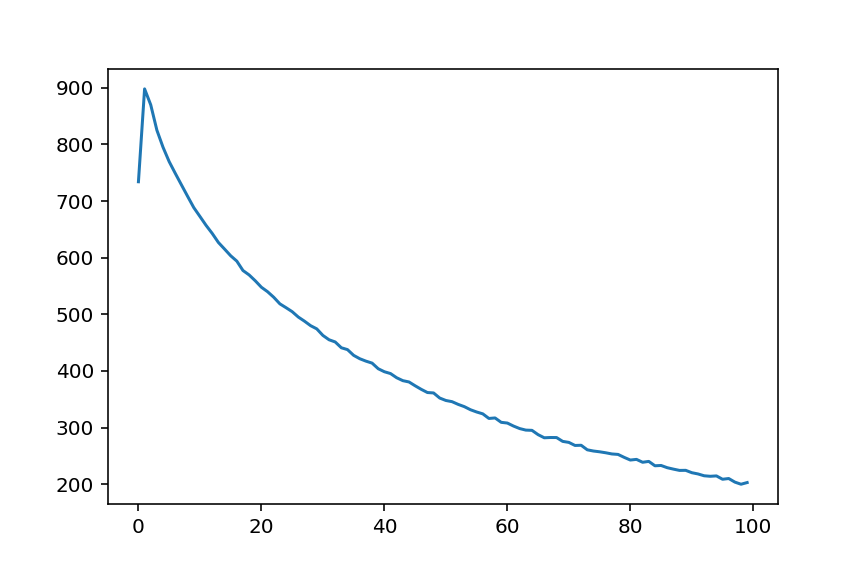

In [156]:
plt.plot(means[0:100])


In [248]:
reload(hc)
data_folder = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewerfiles/hic-53-54-distnorm'
track_folder = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewerfiles/viewer_tracks'
save_folder = '/Users/michaelstadler/Bioinformatics/Projects/insulators/viewerfiles/saves/hic-53-54'
hc.viewer(data_folder, track_folder, save_folder)

ValueError: too many values to unpack (expected 3)

In [247]:
type(3.0 // 2)
3.0 // 2

1.0